In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_excel('data/Monthly Mastersheet.xlsx')

print(df.shape)

# Identify numeric columns only (excludes datetime, strings, etc.)
# added this
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns for PCA:", numeric_cols)


scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=df.index)
# changed this part  up

print(scaled_df.shape)


print(scaled_df)

print(scaled_df.dtypes)
print(scaled_df.isnull().sum())

print("Before NA drop : " + str(scaled_df.shape))
scaled_df = scaled_df.dropna()
print("AFTER NA drop : " + str(scaled_df.shape))

print(scaled_df.shape)


(89, 36)
Numeric columns for PCA: Index(['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin',
       'Cardano', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP',
       'IM', 'EX', 'CC', 'CC Monthly % Change', 'Bitcoin Price', 'GDP Monthly',
       'vol_LFPR', 'vol_CPI', 'vol_r', 'vol_M1', 'vol_GDP', 'vol_IM', 'vol_EX',
       'vol_CC', 'PC1_macro', 'PC2_macro', 'PC1_crypto', 'PC2_crypto',
       'PC1_macro.1', 'PC2_macro.1'],
      dtype='object')
(89, 35)
     Bitcoin    Tether  Litecoin       XRP  Ethereum  Dogecoin   Cardano  \
0   0.916357  1.020463  0.938104  1.000136  0.459811 -0.144167       NaN   
1   1.063206  1.094440  1.569994  0.533519  1.651319  1.243562       NaN   
2   0.362260  0.862752 -0.094169  0.445469 -0.815504 -0.094026       NaN   
3   1.240928  2.069150  0.723540  0.327256  0.485816  0.893431       NaN   
4   2.168643  1.908262  2.872895  2.772039  1.717196  1.436135       NaN   
..       ...       ...       ...       ...       ...       ..

In [3]:
macro_vars = ['Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano']

pca = PCA(n_components=6)

my_data_df_scaled_PCA = pca.fit_transform(scaled_df[macro_vars])


pca_df = pd.DataFrame(my_data_df_scaled_PCA, columns=[f'PC{i+1}' for i in range(6)], index=scaled_df.index)


print(pca_df)



explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Eigenvalue': explained_var,
    'Explained Variance (%)': explained_var_ratio * 100,
    'Cumulative Variance (%)': cumulative_var_ratio * 100
})

print(summary_df)


         PC1       PC2       PC3       PC4       PC5       PC6
16  2.082881 -1.064138 -0.178724  0.100604  0.080413  0.323825
17  0.052768 -1.346832  0.395287  0.409337  0.116053  0.445189
18  0.050607 -1.058410  0.678082  0.424766  1.177308  0.648602
19 -2.934234 -1.056703  0.989658  1.671477  0.722342 -0.174761
20  1.086668 -0.048541 -0.461813 -0.153618  0.502663 -0.691982
..       ...       ...       ...       ...       ...       ...
84  0.153053 -0.171178 -0.300173 -0.211878 -0.339741  0.457331
85 -2.016195  0.411744 -0.423381 -0.008280 -0.417676  0.084388
86 -1.971058  0.597745 -0.494627 -0.226272 -0.138027  0.113114
87  1.982118  0.475958  0.911519  0.265961 -0.309054 -0.310998
88  0.563915  0.259661  1.341555 -0.087841  0.401131 -0.032997

[73 rows x 6 columns]
  Principal Component  Eigenvalue  Explained Variance (%)  \
0                 PC1    4.102519               70.455275   
1                 PC2    0.736277               12.644566   
2                 PC3    0.396015     

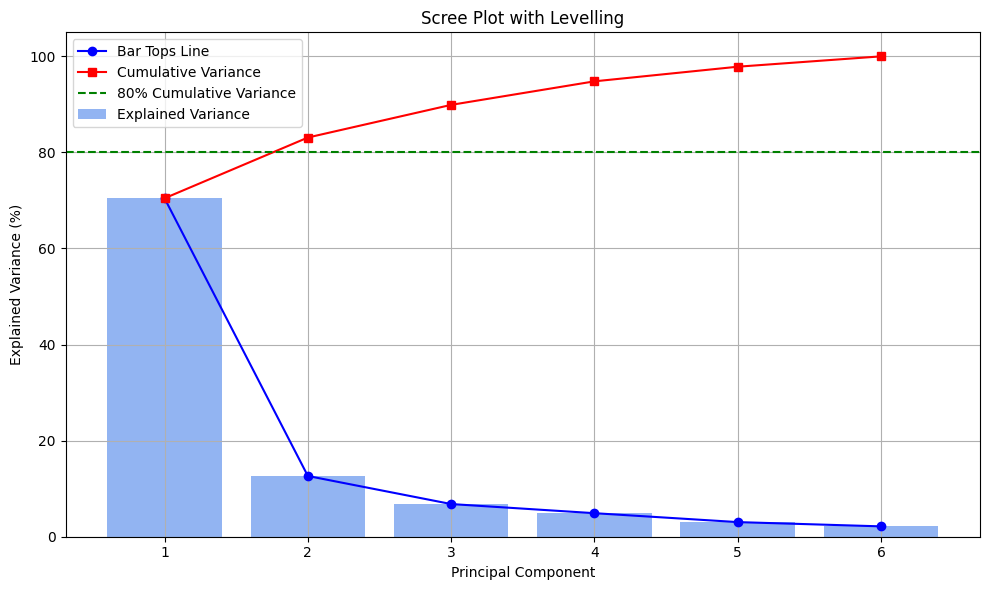

In [4]:

explained_variance_ratio = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = len(explained_variance_ratio)
avg_explained = 1.0 / n_components  # average variance threshold

x_vals = np.arange(1, n_components + 1)
y_vals = explained_variance_ratio * 100

plt.figure(figsize=(10, 6))

plt.bar(x_vals, y_vals, alpha=0.7, color='cornflowerblue', label='Explained Variance')

plt.plot(x_vals, y_vals, marker='o', color='blue', label='Bar Tops Line')

plt.plot(x_vals, cumulative_variance * 100, marker='s', color='red', label='Cumulative Variance')

# 80% line
plt.axhline(y=80, color='green', linestyle='--', label='80% Cumulative Variance')

# Plot formatting
plt.title('Scree Plot with Levelling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(x_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
#added this
loading_df = pd.DataFrame(
    pca.components_.T,
    index=macro_vars,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

cutoff = 0.5

filtered_loading_df = loading_df[(loading_df.abs() >= cutoff).any(axis=1)]

print(filtered_loading_df)

pc = 'PC1'
print(filtered_loading_df[pc].sort_values(key=abs, ascending=False))

               PC1       PC2       PC3       PC4       PC5       PC6
Bitcoin   0.393838 -0.256144 -0.555244 -0.424581 -0.272596 -0.465197
Litecoin  0.430031 -0.185553  0.248658 -0.102946  0.814000 -0.213585
XRP       0.409683  0.156913  0.585107 -0.522649 -0.359904  0.249990
Ethereum  0.439186 -0.299337 -0.345243  0.205868  0.026761  0.745132
Dogecoin  0.345737  0.876773 -0.288833  0.120929  0.114724 -0.022916
Cardano   0.423918 -0.130403  0.291386  0.692073 -0.345957 -0.346022
Ethereum    0.439186
Litecoin    0.430031
Cardano     0.423918
XRP         0.409683
Bitcoin     0.393838
Dogecoin    0.345737
Name: PC1, dtype: float64
